In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import scipy.stats as stats

In [2]:
nestle_stock_prices_dict = {}
nestle_stock_prices_df = pd.read_csv("nestle.csv")
for datestr, price in zip(nestle_stock_prices_df["Date"], nestle_stock_prices_df["Close Price"]):
    nestle_stock_prices_dict[datetime.strptime(datestr, "%d-%B-%Y").date()] = price

In [3]:
distribution = set()
for date in nestle_stock_prices_dict:
    if date + timedelta(days=5) in nestle_stock_prices_dict:
        distribution.add(nestle_stock_prices_dict[date + timedelta(days=5)] - nestle_stock_prices_dict[date])

In [4]:
distribution = np.array(list(distribution))
mean = np.mean(distribution)
std = np.std(distribution)

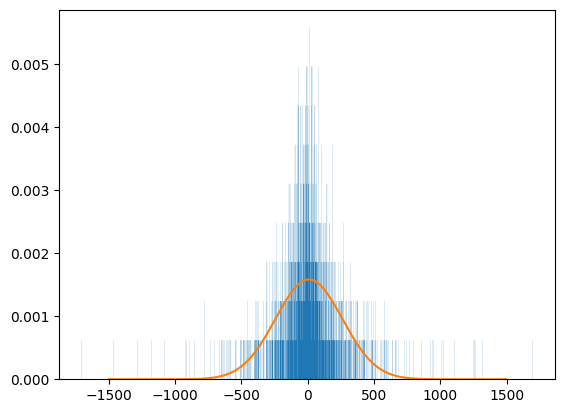

In [5]:
x_axis = np.arange(-1500, 1500)
plt.hist(distribution, bins=3000, density=True, histtype="stepfilled")
plt.plot(x_axis, stats.norm.pdf(x_axis, mean, std))
plt.show()